### This is a dataset of cross-sectional MRI data in young, middle aged, nondemented and demented older adults, found here https://www.kaggle.com/jboysen/mri-and-alzheimers

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cross = pd.read_csv('oasis_cross-sectional.csv', sep=',')
df_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [3]:
df_long = pd.read_csv('oasis_longitudinal.csv', sep=',')
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df_long.shape

(373, 15)

In [5]:
df_long.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

#### Rename the column 'M/F' in 'Sex'

In [6]:
df_long.rename(columns={'M/F': 'Sex'}, inplace=True)
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### Let's see some descriptive stats of this dataset:

In [7]:
df_long.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### These are values of all the patients tested, with and without dementia. They tell us something about the experiemntal design and the sample, but not about the differences between the groups of patients with different conditions. So let's analyze the groups separately:

In [9]:
df_long.Group.describe()

count             373
unique              3
top       Nondemented
freq              190
Name: Group, dtype: object

#### There are three group categories of patients, the most common being Nondemented. Let's find the other categories:

In [10]:
df_long.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

### The 'Demented' group:

In [15]:
demented = df_long[df_long.Group=='Demented']
demented.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286


In [16]:
demented.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,146.000000,146.000000,146.000000,146.000000,127.000000,144.000000,146.000000,146.000000,146.000000,146.000000
mean,1.732877,452.541096,76.260274,13.671233,2.771654,24.513889,0.671233,1485.849315,0.716301,1.196890
std,0.790383,513.838511,6.940193,2.898536,1.196483,4.497064,0.296173,173.769461,0.031921,0.137177
min,1.000000,0.000000,61.000000,6.000000,1.000000,4.000000,0.500000,1143.000000,0.646000,0.897000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,22.000000,0.500000,1357.000000,0.694250,1.120000
50%,2.000000,490.500000,76.000000,13.000000,3.000000,26.000000,0.500000,1476.500000,0.712000,1.188500
75%,2.000000,693.250000,81.000000,16.000000,4.000000,28.000000,1.000000,1566.500000,0.737000,1.293000
max,5.000000,2508.000000,98.000000,20.000000,5.000000,30.000000,2.000000,1957.000000,0.806000,1.535000


### The 'Nondemented' group:

In [17]:
nondemented = df_long[df_long.Group=='Nondemented']
nondemented.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [18]:
nondemented.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.968421,670.242105,77.057895,15.142105,2.394737,29.226316,0.005263,1495.500000,0.740900,1.191063
std,0.980796,672.807019,8.096104,2.742149,1.047534,0.882722,0.051163,184.888262,0.037705,0.144029
min,1.000000,0.000000,60.000000,8.000000,1.000000,26.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,13.000000,2.000000,29.000000,0.000000,1358.250000,0.717250,1.073750
50%,2.000000,631.000000,77.000000,16.000000,2.000000,29.000000,0.000000,1474.500000,0.739000,1.190000
75%,2.750000,1129.750000,82.000000,18.000000,3.000000,30.000000,0.000000,1634.750000,0.769000,1.292500
max,5.000000,2517.000000,97.000000,23.000000,5.000000,30.000000,0.500000,2004.000000,0.837000,1.587000


### The 'Converted' group:

In [19]:
converted = df_long[df_long.Group=='Converted']
converted.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093


In [20]:
converted.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.00000,37.000000
mean,2.027027,771.810811,79.756757,15.459459,1.72973,28.675676,0.256757,1459.270270,0.72373,1.212405
std,1.040472,767.296366,7.425203,2.523166,0.96173,1.564432,0.253356,135.432773,0.03543,0.109295
min,1.000000,0.000000,65.000000,12.000000,1.00000,24.000000,0.000000,1264.000000,0.66600,1.019000
25%,1.000000,0.000000,74.000000,14.000000,1.00000,28.000000,0.000000,1383.000000,0.69600,1.106000
50%,2.000000,706.000000,81.000000,16.000000,1.00000,29.000000,0.500000,1423.000000,0.71800,1.234000
75%,3.000000,1422.000000,86.000000,18.000000,2.00000,30.000000,0.500000,1587.000000,0.75000,1.269000
max,5.000000,2639.000000,92.000000,20.000000,4.00000,30.000000,0.500000,1722.000000,0.79900,1.388000


#### To sum the first observations:
#### In this sample there are 190 nondemented, 146 demented, and 37 converted patients.
#### The average age is lowest for the demented patients, namely 76 years, compared to 77 years of nondemented and 79 years for converted patients.
#### Demented patients have less years of education (on average 13 years) than the other two groups (15 years).
#### Demented patients have the highest socioeconomic status (2.7) of the two groups (2.3 for nondemented, 1.7 for converted).

Text(0.5,1,'Gender and Demented rate')

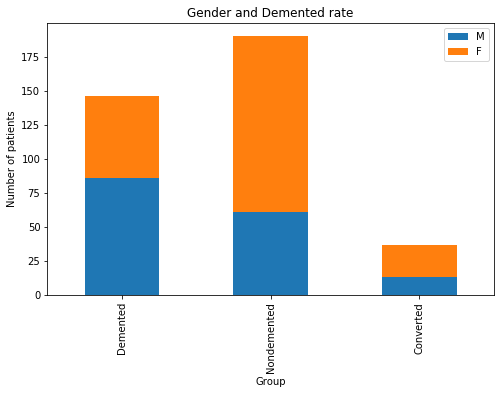

In [26]:
def bar_chart(feature):
    Demented = df_long[df_long.Group=='Demented'][feature].value_counts()
    Nondemented = df_long[df_long.Group=='Nondemented'][feature].value_counts()
    Converted = df_long[df_long.Group=='Converted'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented,Converted])
    df_bar.index = ['Demented','Nondemented','Converted']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    
bar_chart('Sex')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')